 COGNIFYZ GEOSPATIAL ANALYSIS STARTED
 Dataset loaded: 9,551 rows × 21 columns
 Latitude & Longitude columns found

 Creating interactive restaurant location map
 Map saved as 'restaurant_location_map.html'

 Analyzing restaurant distribution across cities and countries


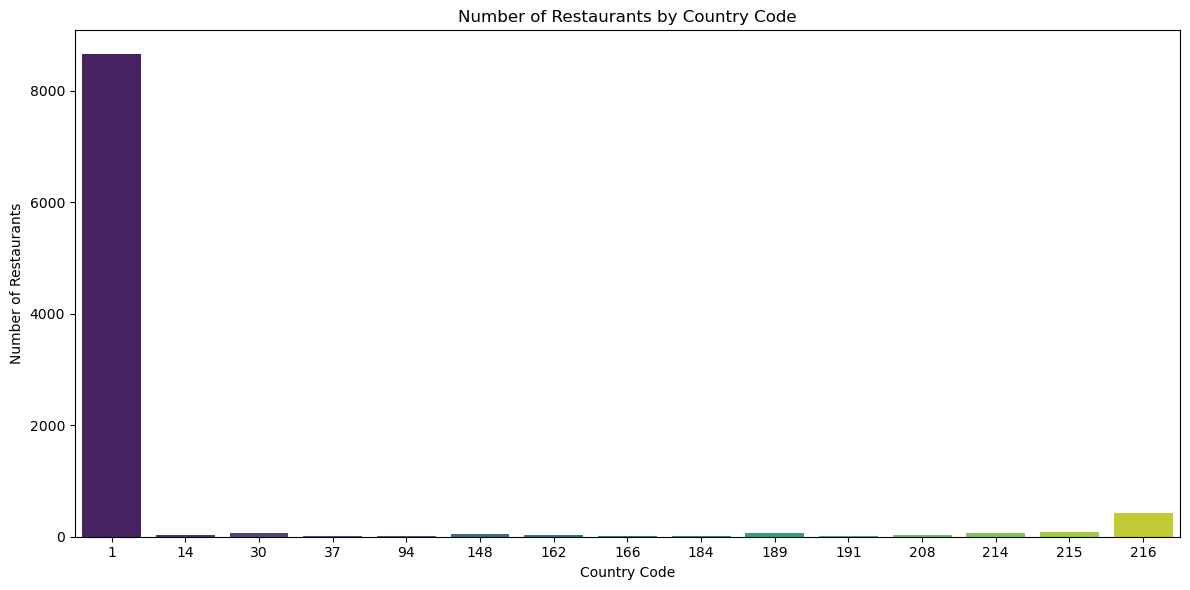

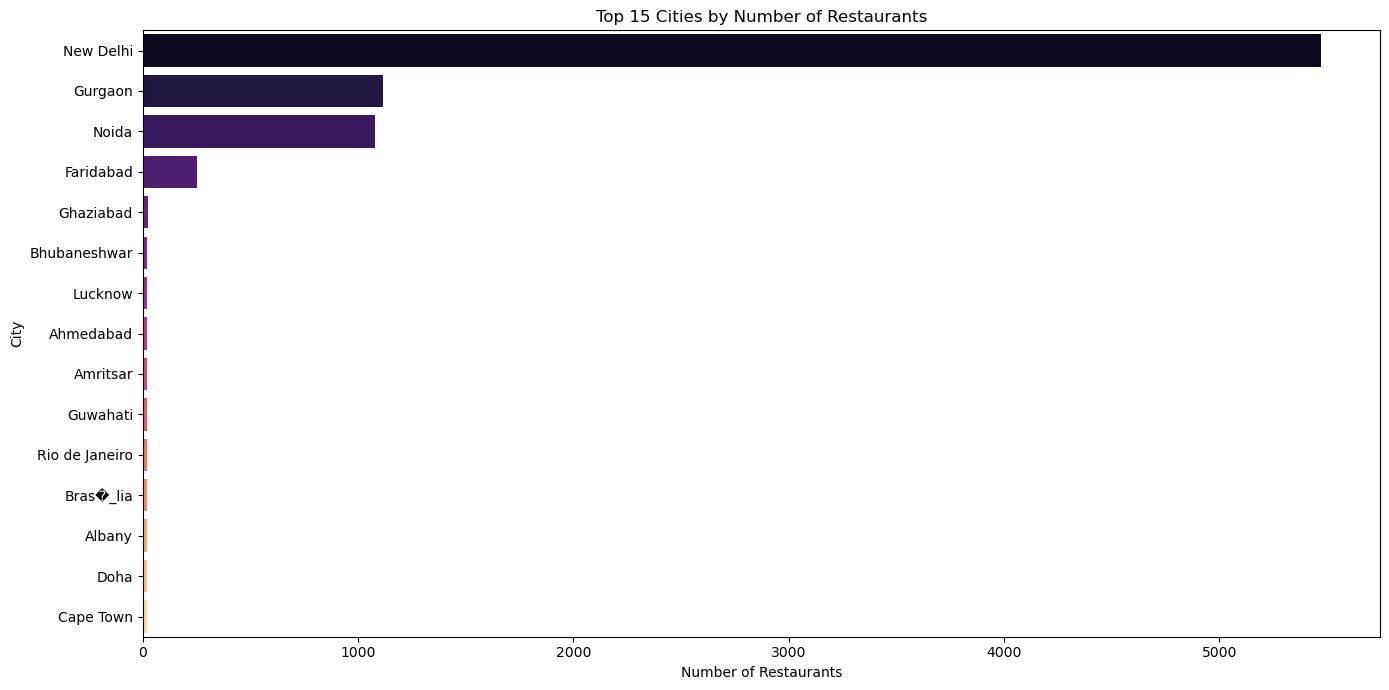


 Analyzing correlation between location and aggregate rating
Correlation between Latitude and Rating: 0.001
Correlation between Longitude and Rating: -0.117


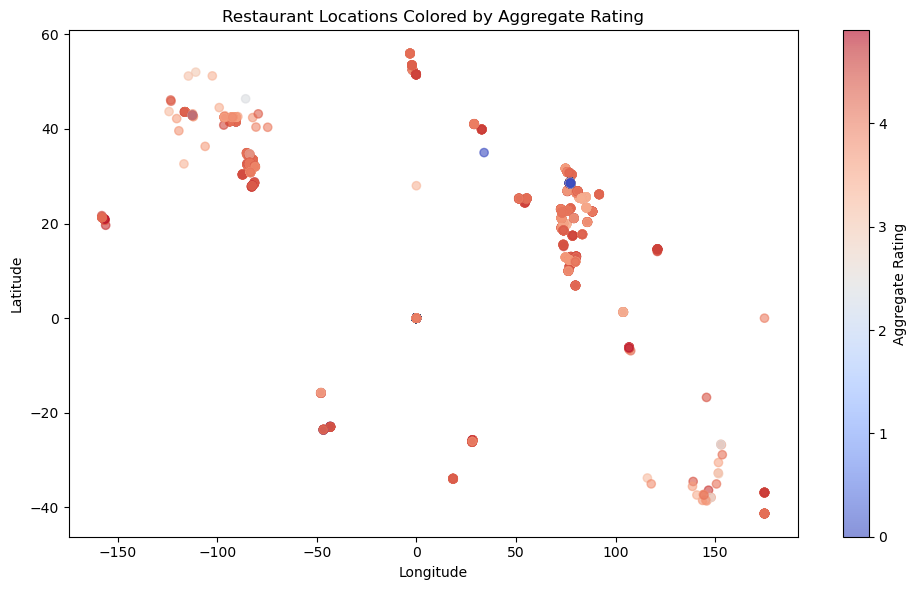


 GEOSPATIAL ANALYSIS COMPLETED!
 Files generated:
 - restaurant_location_map.html
 - restaurant_distribution_by_country.png
 - restaurant_distribution_by_city.png
 - location_rating_scatter.png


In [1]:
# =============================================================================
# COGNIFYZ TECHNOLOGIES - GEOSPATIAL ANALYSIS TASK 3
# Visualize restaurants on map & analyze location-rating correlation
# =============================================================================

import pandas as pd
import numpy as np
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print(" COGNIFYZ GEOSPATIAL ANALYSIS STARTED\n" + "="*80)

# =============================================================================
# 1. LOAD DATASET (Use original dataset file)
# =============================================================================
df = pd.read_csv('Dataset .csv')  # Replace with your actual data file name if different
print(f" Dataset loaded: {df.shape[0]:,} rows × {df.shape[1]} columns")

# Check presence of latitude and longitude columns
if 'Latitude' in df.columns and 'Longitude' in df.columns:
    print(f" Latitude & Longitude columns found")
else:
    raise KeyError("Latitude and Longitude columns not found in dataset!")

# =============================================================================
# 2. CREATE INTERACTIVE MAP WITH MARKERS
# =============================================================================
print("\n Creating interactive restaurant location map")

# Initialize map at mean location or central location
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=5)

# Add marker cluster for performance
marker_cluster = MarkerCluster().add_to(restaurant_map)

# Add points with popup restaurant info and rating
for _, row in df.iterrows():
    location = (row['Latitude'], row['Longitude'])
    popup_text = f"<b>{row.get('Restaurant Name', 'Restaurant')}</b><br>Rating: {row.get('Aggregate rating', 'N/A')}"
    folium.Marker(location=location, popup=popup_text).add_to(marker_cluster)

# Save map to HTML
restaurant_map.save('restaurant_location_map.html')
print(" Map saved as 'restaurant_location_map.html'")

# =============================================================================
# 3. DISTRIBUTION ANALYSIS BY LOCATION
# =============================================================================
print("\n Analyzing restaurant distribution across cities and countries")

# By Country Code distribution
if 'Country Code' in df.columns:
    country_counts = df['Country Code'].value_counts()
    plt.figure(figsize=(12,6))
    sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
    plt.title('Number of Restaurants by Country Code')
    plt.xlabel('Country Code')
    plt.ylabel('Number of Restaurants')
    plt.tight_layout()
    plt.savefig('restaurant_distribution_by_country.png')
    plt.show()
else:
    print(" 'Country Code' column not found")

# By City distribution (top 15)
if 'City' in df.columns:
    top_cities = df['City'].value_counts().head(15)
    plt.figure(figsize=(14,7))
    sns.barplot(y=top_cities.index, x=top_cities.values, palette='magma')
    plt.title('Top 15 Cities by Number of Restaurants')
    plt.xlabel('Number of Restaurants')
    plt.ylabel('City')
    plt.tight_layout()
    plt.savefig('restaurant_distribution_by_city.png')
    plt.show()
else:
    print(" 'City' column not found")

# =============================================================================
# 4. CORRELATION BETWEEN LOCATION AND RATING
# =============================================================================
print("\n Analyzing correlation between location and aggregate rating")

# Aggregate rating correlation with lat/lon
if 'Aggregate rating' in df.columns:
    corr_lat = df['Latitude'].corr(df['Aggregate rating'])
    corr_lon = df['Longitude'].corr(df['Aggregate rating'])
    print(f"Correlation between Latitude and Rating: {corr_lat:.3f}")
    print(f"Correlation between Longitude and Rating: {corr_lon:.3f}")

    # Scatter plot with color scale by rating
    plt.figure(figsize=(10,6))
    sc = plt.scatter(df['Longitude'], df['Latitude'], c=df['Aggregate rating'], cmap='coolwarm', alpha=0.6)
    plt.colorbar(sc, label='Aggregate Rating')
    plt.title('Restaurant Locations Colored by Aggregate Rating')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.tight_layout()
    plt.savefig('location_rating_scatter.png')
    plt.show()
else:
    print(" 'Aggregate rating' column not found")

print("\n GEOSPATIAL ANALYSIS COMPLETED!")
print(" Files generated:")
print(" - restaurant_location_map.html")
print(" - restaurant_distribution_by_country.png")
print(" - restaurant_distribution_by_city.png")
print(" - location_rating_scatter.png")

